# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Parte 1

### _Setup_ da parte 1

In [2]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [3]:
# Sua análise da parte 1 começa aqui.


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [4]:
#Quartis da normal:
norm_quant = dataframe.normal.quantile([.25,.5,.75])
binom_quanto = dataframe.binomial.quantile([.25,.5,.75])

a1 = round(norm_quant - binom_quanto,3); a1


# In[6]:


a1 = tuple(a1);a1

(0.31, -0.01, -0.316)

In [5]:
def q1():
    return a1
    # Retorne aqui o resultado da questão 1.
    pass

In [6]:
# Esperava por que para um valor de n (experimentos) maior do que 20 a binomial já se aproxima de uma normal 

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

0.684

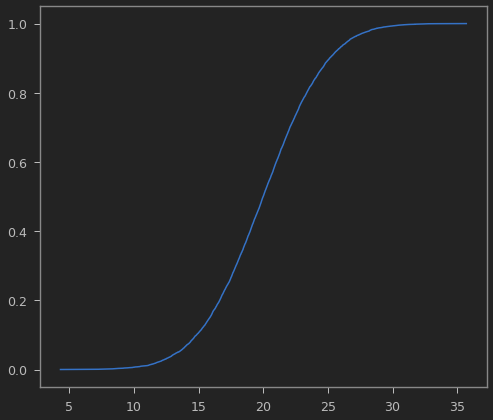

In [7]:
empirica = ECDF(dataframe.normal); empirica


# In[10]:


plt.plot(empirica.x, empirica.y)


# In[11]:



def prob_inter(dataframe, m):
    media = dataframe.normal.mean()
    desv_pad = dataframe.normal.std()
    
    prob = round((empirica(media + m*desv_pad) - empirica(media - m*desv_pad)), 3)
    
    return prob


# In[12]:


a2 = prob_inter(dataframe, 1); a2


In [8]:
def q2():
    return a2
    # Retorne aqui o resultado da questão 2.
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [9]:
#De acordo com o esperado o valor seria de 68,27 %, como está arredondado
#Experimentando:
#List comprehension
[prob_inter(dataframe, x) for x in [1,2,3]]

[0.684, 0.954, 0.997]

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [10]:
def questao3(dataframe):
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()

    return (m_binom, v_binom, m_norm, v_norm)

In [11]:
# In[16]:
array_q3 = questao3(dataframe); array_q3
a3 = tuple([round(x,3) for x in (array_q3[0] - array_q3[2], array_q3[1] - array_q3[3])])
a3

(0.106, 0.22)

In [12]:
def q3():
    return a3
    # Retorne aqui o resultado da questão 3.
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

#### Efeito na kurtosis, ficando mais fina (leptocúrtica, b2>0)

In [13]:
from math import sqrt

In [14]:
# In[19]:


np.random.seed(42)

def norm_binom(n, p, size):
    df = pd.DataFrame({"normal": sct.norm.rvs(loc = n*p, scale = sqrt(n*p*(1-p)), size=size),
                     "binomial": sct.binom.rvs(n, p = p, size=size)}) 
    return df

df_100 = norm_binom(100, 0.2, 10000)
df_1000 = norm_binom(1000, 0.2, 10000)

(df_100.kurtosis(), df_1000.kurtosis())

(normal      0.027093
 binomial    0.002033
 dtype: float64,
 normal     -0.049561
 binomial    0.012410
 dtype: float64)

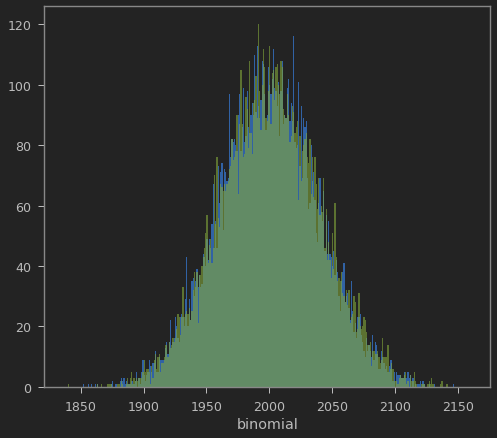

In [15]:
# In[20]:


n = 10000; p = 0.2; size = 10000

#Sendo a média 20, utilizar o range (0,40) para visualização
left = norm_binom(n,p,size).mean() -4*norm_binom(n,p,size).std()
right = norm_binom(n,p,size).mean() +4*norm_binom(n,p,size).std()


# In[21]:


sns.distplot(norm_binom(n,p,size).normal, bins = range(int(left[0]),int(right[0])), kde = False, hist_kws={'alpha': 0.8}) 
sns.distplot(norm_binom(n,p,size).binomial, bins = range(int(left[1]),int(right[1])), kde = False, hist_kws={'alpha': 0.6})

## Parte 2

### _Setup_ da parte 2

In [16]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [17]:
# Sua análise da parte 2 começa aqui.


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [18]:
#Número de pulsars e não pulsars
stars.target.value_counts()

False    16258
True      1639
Name: target, dtype: int64

In [19]:
#1 Filtrar:
false_pulsar_mean_profile = stars[stars['target']==0]['mean_profile']; false_pulsar_mean_profile
#Encontrar os quantis teóricos, ou seja, encontrar os xs tais que representem 0.8, 0.90 e 0.95 da probabilidade
quantis_teoricos = [sct.norm.ppf(x,loc = 0, scale = 1) for x in [0.8,0.90,0.95]]; quantis_teoricos

[0.8416212335729143, 1.2815515655446004, 1.6448536269514722]

In [20]:
false_pulsar_mean_profile_standardized = sct.zscore(false_pulsar_mean_profile)
a4_ecdf = ECDF(false_pulsar_mean_profile_standardized);

In [21]:
a4 = tuple([round(x,3) for x in a4_ecdf(quantis_teoricos)]); a4

(0.806, 0.911, 0.959)

In [22]:
def q4():
    return a4
    # Retorne aqui o resultado da questão 4.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

In [23]:
#### Fazem sentido porque são as porcentagens equivalentes dos quartris a partir daa normal, dado que a distribuição aqui foi normalizada

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [24]:
quantiles_empirica = np.quantile(false_pulsar_mean_profile_standardized, [.25,.5,.75])

In [25]:
quantiles_normal = sct.norm.ppf([.25 ,.5 ,.75])

In [26]:
a5 = tuple(np.round(quantiles_empirica - quantiles_normal,3 )); a5

(0.027, 0.04, -0.004)

In [27]:
def q5():
    return a5
    # Retorne aqui o resultado da questão 5.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

In [28]:
#Fazem sentido porque estão próximos de 0, devido a ambas distribuições serem padronizadas
#Isso pode dizer que de fato a variável false_pulsar_mean_profile_standardized foi padronizada corretamente
#Sensacional
